Perform Analysis and Basic Recommendations based on similar genres and movies which users prefer

Some of the key points on which we willl be focusing include:
1. Profitability of Movies
2. Language based Gross Analysis
3. Comparison of Gross and Profit for Different Genres
4. Recommendation systems based on Actors, Movies, Genres

This project will help us understand Correlation between these Factors.

In [2]:
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

#basic operations
import numpy as np

#for dataframe manipulations
import pandas as pd

#for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#for data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#for missing values
import missingno as mno


#for date time manipulation
import datetime

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#setting up the background style for the plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
pip install ipython

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [4]:
pip install --upgrade IPython

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [5]:
from IPython.display import display

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
data = pd.read_csv('movie_metadata.csv')

data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
data.shape

(5043, 28)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [10]:
#Removing unecessary columns

data = data.drop(['color',
                 'director_facebook_likes',
                 'actor_3_facebook_likes',
                 'actor_1_facebook_likes',
                 'cast_total_facebook_likes',
                 'actor_2_facebook_likes',
                 'facenumber_in_poster',
                 'content_rating',
                 'country',
                 'movie_imdb_link',
                 'aspect_ratio',
                 'plot_keywords'], axis = 1)

data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [11]:
#Missing values

round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [12]:
#Since budget and gross columns have large number of missing values, we will drop
#all the rows withNaNs at this column using the ''isnan' function of Numpy alongwith a negation ''

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [13]:
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [14]:
data = data[data.isnull().sum(axis = 1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [15]:
#Inputing missing values

#Use mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

#Use mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

#Replace
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

#Done with imputing all the missing data

#Total number of null values
data.isnull().sum().sum()           
                    

0

Feature Engineering

Calculating the Profitability of the Movies

In [16]:
# Lets convertthe gross and budget from $ to million$ to make analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [17]:
#Creating a profit column

data['Profit'] = data['gross'] - data['budget']

In [18]:
#Lets check for the top 10 most profitable movies

data[['Profit','movie_title']].sort_values(by = 'Profit', ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [19]:
#Lets remove the duplicate form the above result

#Lets print the no. of rows before removing Duplicates
print('No. of Rows befor removing Duplicates: ', data.shape[0])

#Removing all duplicates
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

#Lets print the no. of rows after removing duplicates
print('No. of Rows after removing Duplicates: ',data.shape[0])

No. of Rows befor removing Duplicates:  3888
No. of Rows after removing Duplicates:  3853


In [20]:
data[['movie_title','Profit']].sort_values(by = 'Profit', ascending = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


Manipulating the Duration and Language Column

In [21]:
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Persian          3
Thai             3
Hebrew           3
Danish           3
Dutch            3
Dari             2
Indonesian       2
Aboriginal       2
Swedish          1
Filipino         1
Arabic           1
Romanian         1
Aramaic          1
Dzongkha         1
Russian          1
Vietnamese       1
Mongolian        1
Telugu           1
Hungarian        1
Maya             1
Czech            1
Icelandic        1
Zulu             1
None             1
Kazakh           1
Bosnian          1
Name: language, dtype: int64

In [22]:
#Categorising other movies into Foreign Language Movies

def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
#Applying the Function to a Language Column
data['language'] = data['language'].apply(language)

#Check the values again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [23]:
data['duration'].value_counts()

101.0    113
100.0    109
98.0     105
99.0      97
90.0      97
        ... 
216.0      1
240.0      1
65.0       1
45.0       1
225.0      1
Name: duration, Length: 157, dtype: int64

In [24]:
#Categorising other movies into duration of the Movies

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
#Applying the Function to a Language Column
data['duration'] = data['duration'].apply(duration)

#Check the values again
data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [25]:
data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [26]:
#Extracting the Genres of the Movie

data['genres'].value_counts()

Drama                                      153
Comedy|Drama|Romance                       151
Comedy|Drama                               147
Comedy                                     145
Comedy|Romance                             135
                                          ... 
Adventure|Biography|Crime|Drama|Western      1
Biography|Crime|Drama|War                    1
Action|Adventure|Animation|Fantasy           1
Adventure|Crime|Drama|Romance                1
Adventure|Horror|Mystery                     1
Name: genres, Length: 762, dtype: int64

In [27]:
#Splitting the genres to know the total number of genres available

data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [28]:
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

#Some of the movies have only one genre. In such cases , assign the same genre to 'genre2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

#lets check the head of the data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5
                                                         )


,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


Top 10 most Popular Movies on Social Media

Calculating Social Media Popularity
Important Factors to determine the Social Media Popularity Includes:
1. Number of People who voted for the Movie
2. Number of People who reviewed the movie
3. Number of Facebook Likes on the Movie Page

So the formula will be 
Social Media Popularity = ('No. of People who reviewed'/'No. of people who voted for the Movie')*No. of Facebook Likes

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice                  0.001600
1    150                        Ghostbusters                  0.001076
2   1582                        Ghostbusters                  0.001076
3     96                        Interstellar                  0.001025
4   3015               10 Days in a Madhouse                  0.000828
5    945                      Into the Woods                  0.000693
6     73                       Suicide Squad                  0.000653
7   1190                Fifty Shades of Grey                  0.000624
8    108                            Warcraft                  0.000623
9     92        Independence Day: Resurgence                  0.000599


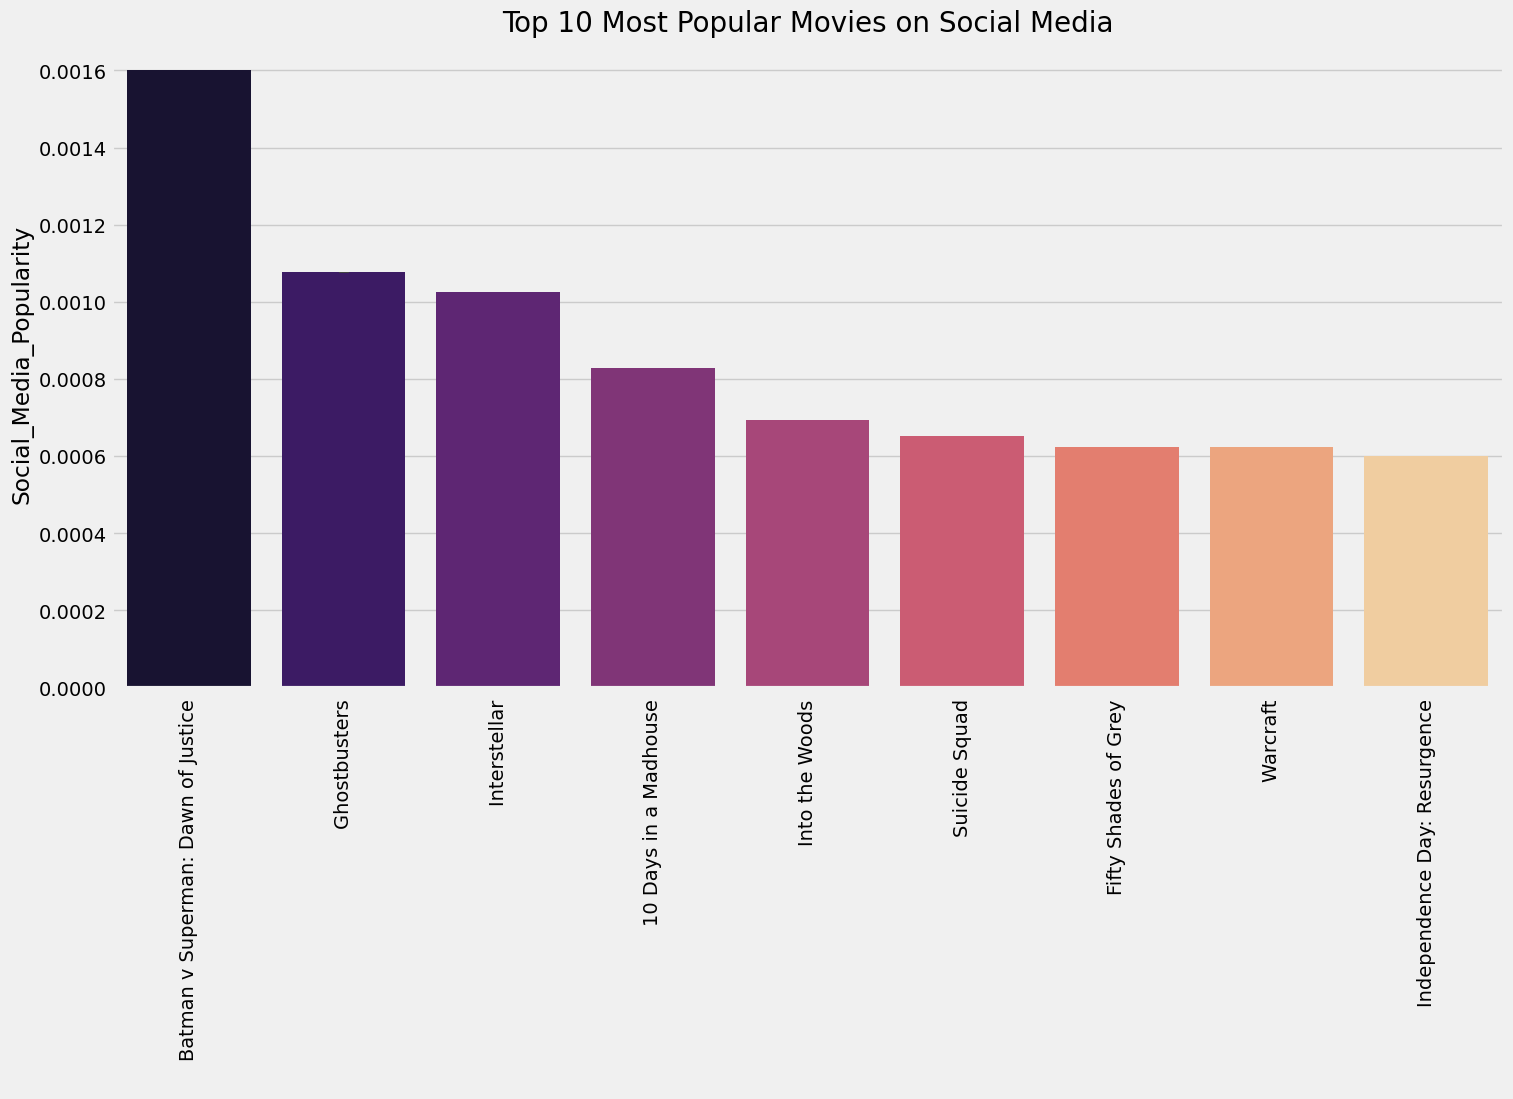

In [29]:
data['Social_Media_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))/1000000

#Lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                               ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

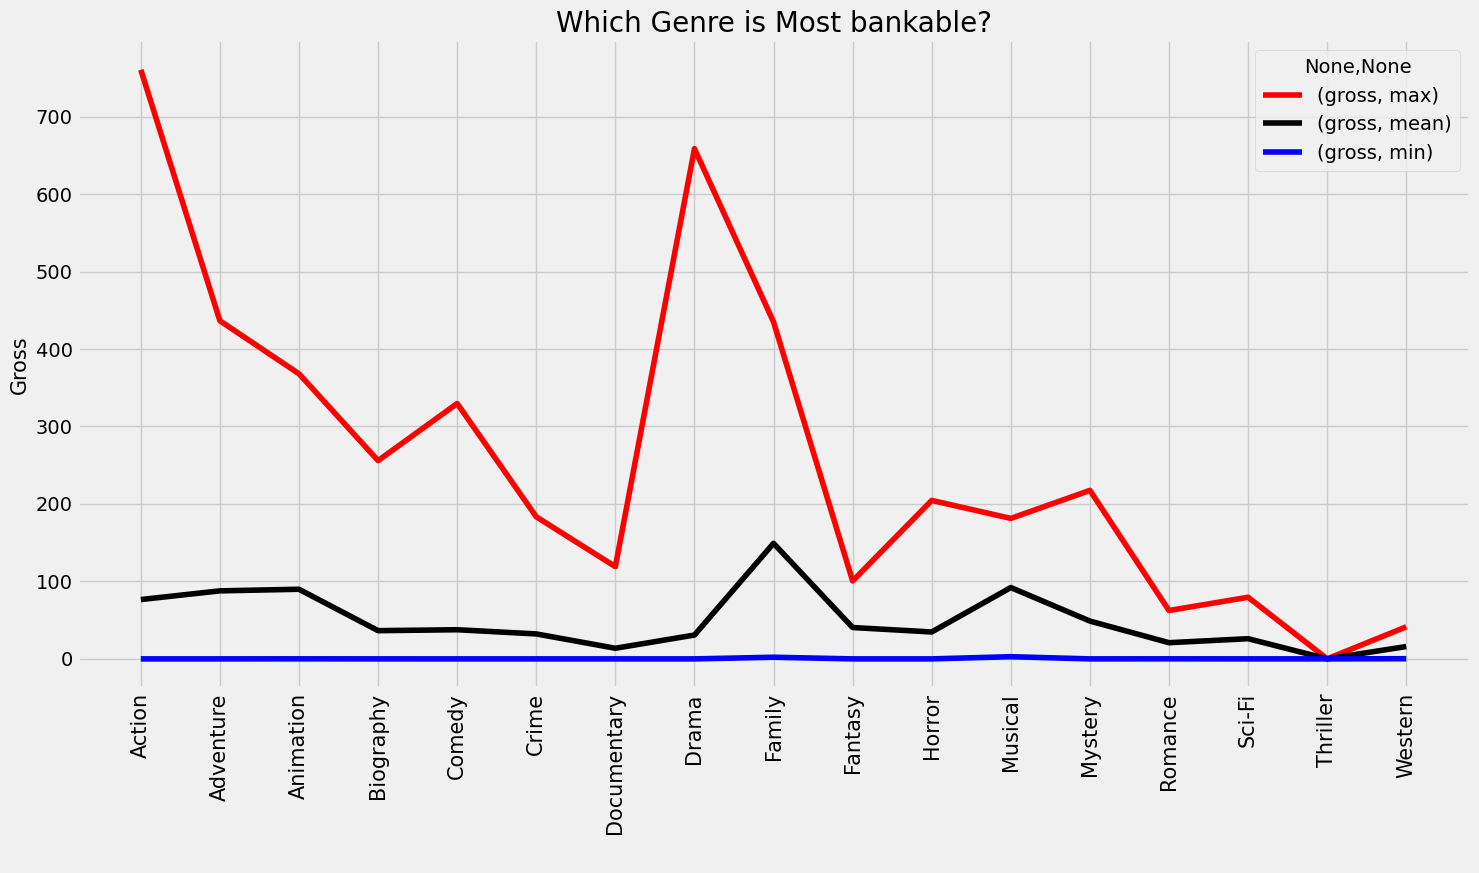

In [30]:
#Analysing the Movie that is most bankable

display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

#lets plot these values using lineplot
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                          'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
                          'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()



In [31]:
print('The Most Profitable Movie form each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                            'movie_title','gross']].style.background_gradient(cmap = 'copper'))

The Most Profitable Movie form each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


Losss and Profit Analysis on English and Foreign Language Movies

In [32]:
#Lets convert year into Integer

data['title_year'] = data['title_year'].astype('int')

In [33]:
print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                    ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

Most Profitable Years in Box Office


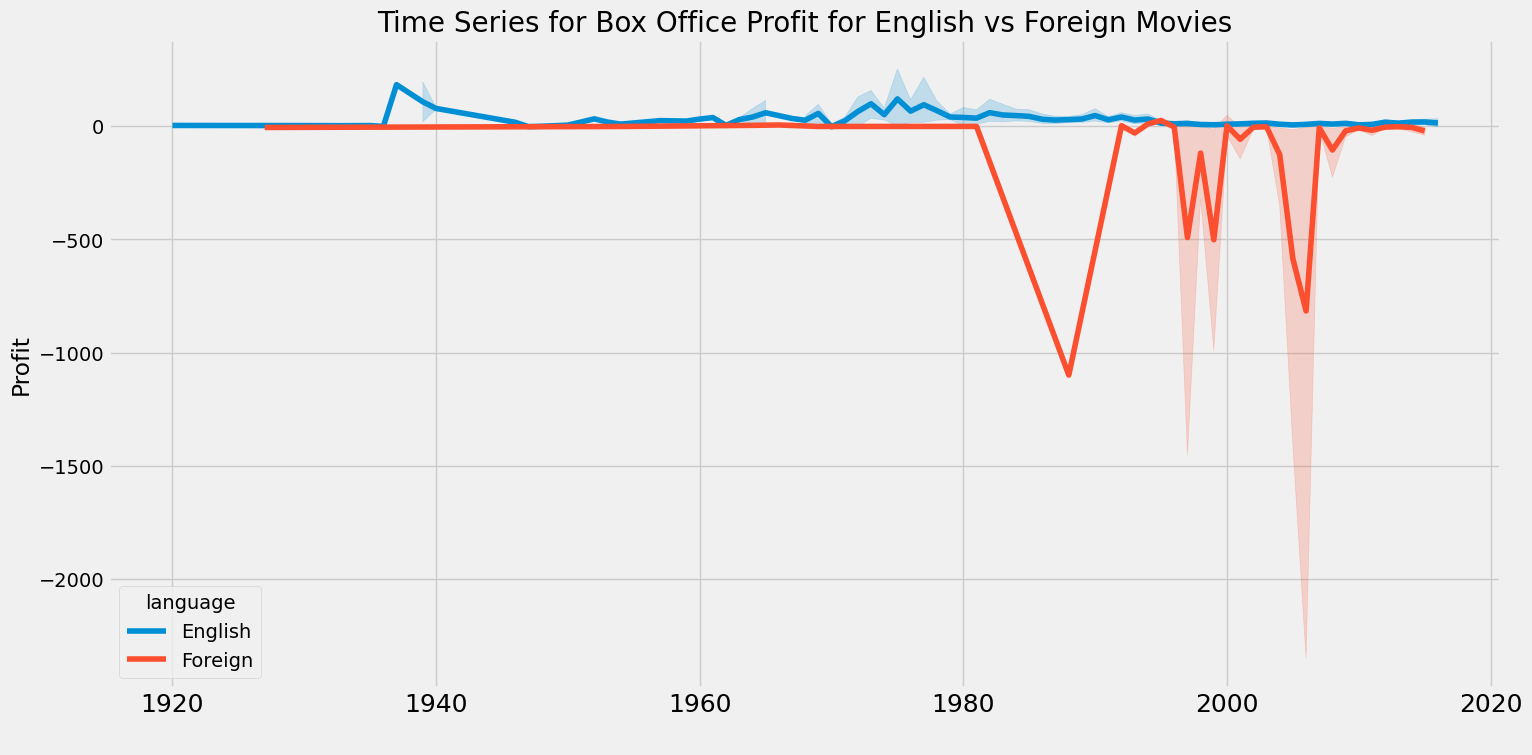

In [34]:
#Plotting

sns.lineplot(data['title_year'],data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

In [35]:
print('Movies that made Huge Losses')
display(data[data['Profit'] < -2000][['movie_title','language',
                                    'Profit']].style.background_gradient(cmap = 'Reds'))

Movies that made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


Gross Comparison of Long and Short Movies

In [36]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,title_year,imdb_score,movie_facebook_likes,Profit,Moviegenres,Genre1,Genre2,Genre3,Genre4,Social_Media_Popularity
0,James Cameron,723.0,Long,Joel David Moore,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,2009,7.9,33000,523.505847,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi,0.000114
1,Gore Verbinski,302.0,Long,Orlando Bloom,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,2007,7.1,0,9.404152,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action,0.000000
2,Sam Mendes,602.0,Long,Rory Kinnear,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,2015,6.8,85000,-44.925825,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action,0.000306
3,Christopher Nolan,813.0,Long,Christian Bale,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,2012,8.5,164000,198.130642,"[Action, Thriller]",Action,Thriller,Action,Action,0.000387
5,Andrew Stanton,462.0,Long,Samantha Morton,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,2012,6.6,24000,-190.641321,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action,0.000083


In [37]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross', 
                    'Profit']].sort_values(by = 'Profit',
                                           ascending = False).head(5).style.background_gradient(cmap = 'spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross', 
                    'Profit']].sort_values(by = 'Profit',
                                           ascending = False).head(5).style.background_gradient(cmap = 'spring'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


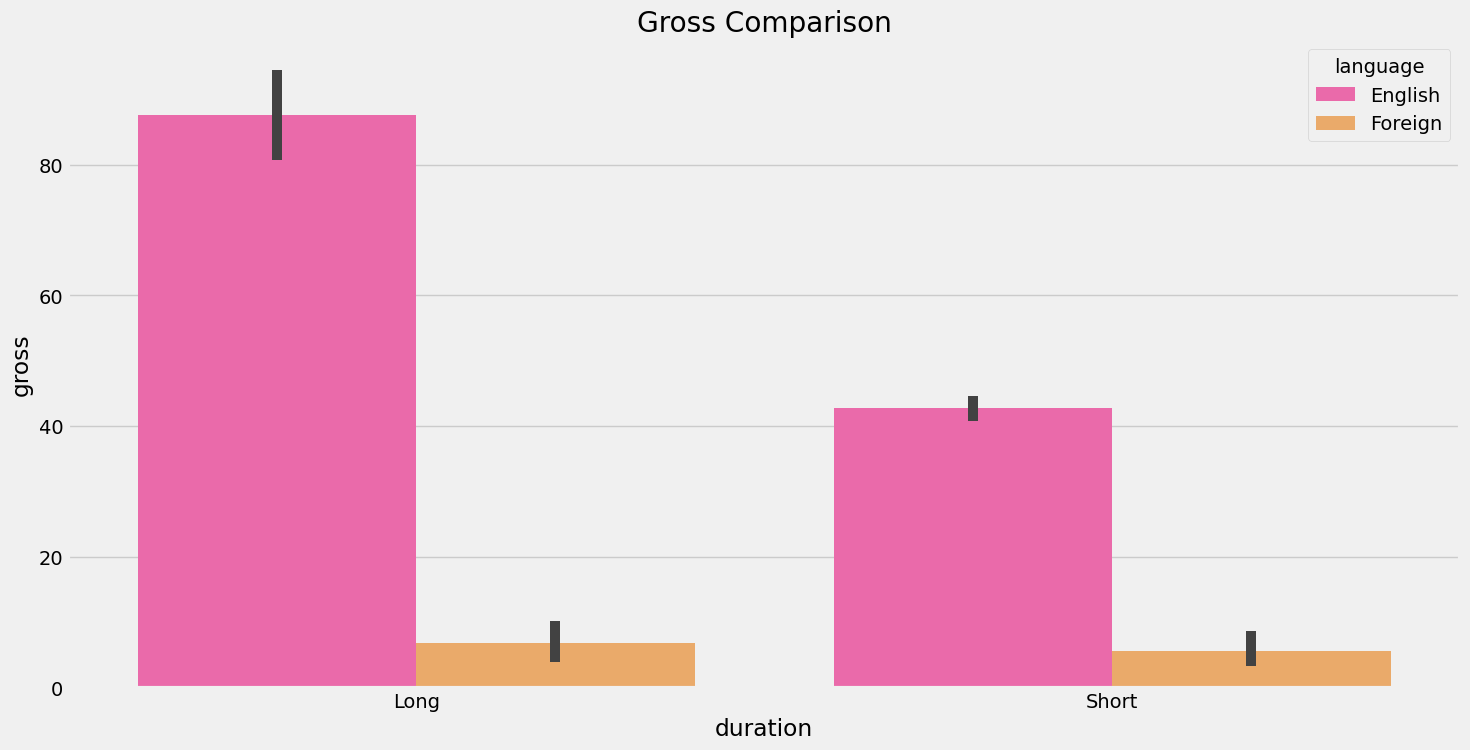

In [38]:
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')
plt.show()

Association between IMDB Ratings and Duration

In [39]:
print('Average IMDB Score for Long Duration Movies is {0:2f}'.format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print('Average IMDB Score for Short Duration Movies is {0:2f}'.format(data[data['duration'] == 'Short']['imdb_score'].mean()))

Average IMDB Score for Long Duration Movies is 7.059433
Average IMDB Score for Short Duration Movies is 6.276941


In [40]:
print('\nHighest Rated Long Duration Movies\n',
     data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print('\nHighest Rated Short Duration Movies\n',
     data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))


Highest Rated Long Duration Movies
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movies
               movie_title  imdb_score
3592  The Usual Suspects          8.6


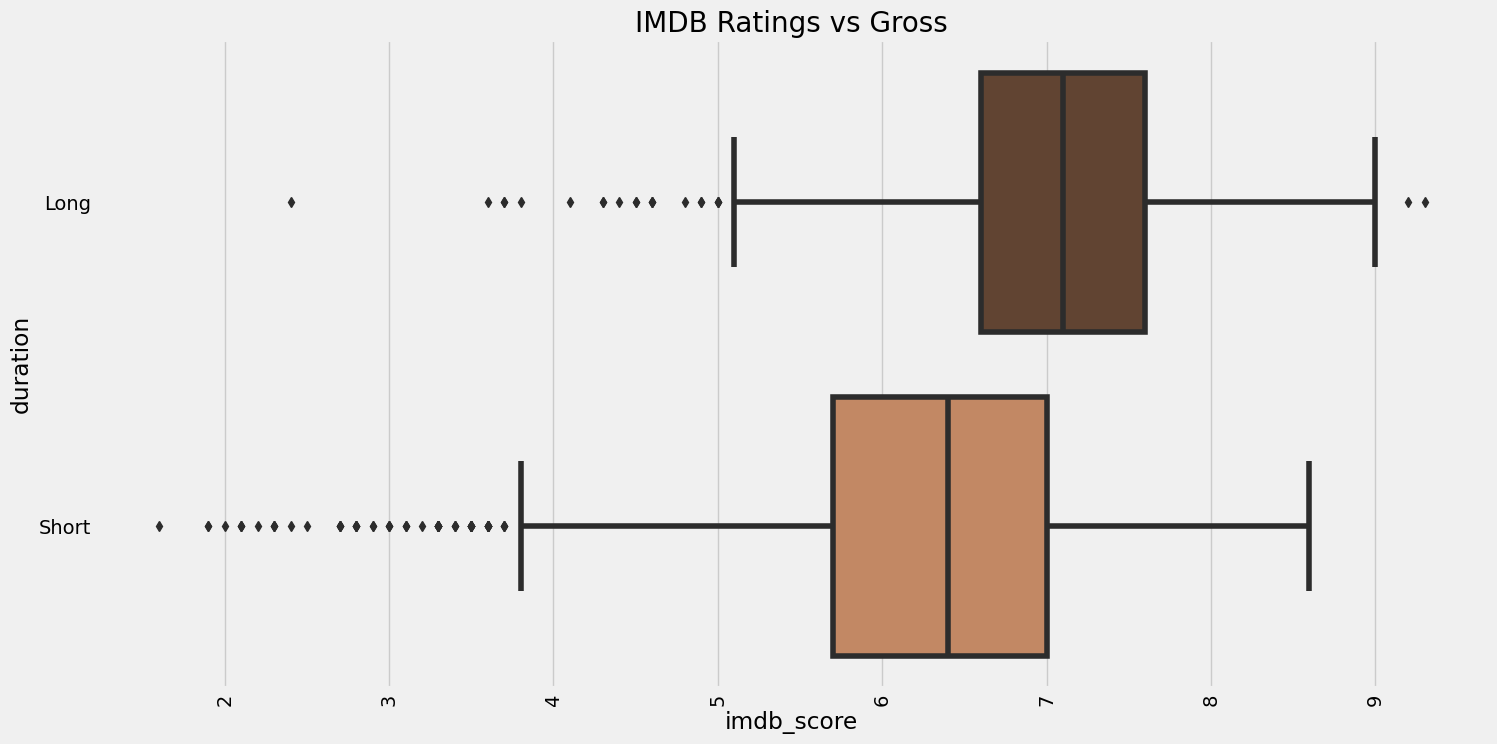

In [41]:
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Actor Comparison

In [42]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
          'budget',
          'gross',
          'title_year',
          'genres',
          'language',
          'imdb_score',
          ]]
    return y

In [43]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [44]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    
    x = a.append(b)
    y = x.append(c)
    
    print('Time',y['title_year'].min(),y['title_year'].max())
    print('Max Gross : {0:2f} Millions'.format(y['gross'].max()))
    print('Avg Gross : {0:2f} Millions'.format(y['gross'].mean()))
    print('Min Gross : {0:2f} Millions'.format(y['gross'].min()))
    print('Number of 100 Million Movies :', y[y['gross'] > 100].shape[0])
    print('Avg IMBD Score :{0:2f}',format(y['imdb_score'].mean()))
    print('Most Common Genres:\n', y['Genre1'].value_counts().head())

actors_report('Meryl Streep')

Time 1985 2014
Max Gross : 143.704210 Millions
Avg Gross : 55.229421 Millions
Min Gross : 9.664316 Millions
Number of 100 Million Movies : 4
Avg IMBD Score :{0:2f} 6.808695652173912
Most Common Genres:
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: Genre1, dtype: int64


In [45]:
def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')

print('Number of Critics Reviewed for Brad Pitt')
display(critically_acclaimed_actors('Brad Pitt'))

print('Number of Critics Reviewed for Leonardo DiCaprio')
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print('Number of Critics Reviewed for Tom Cruise')
display(critically_acclaimed_actors('Tom Cruise'))


Number of Critics Reviewed for Brad Pitt


7814

Number of Critics Reviewed for Leonardo DiCaprio


7014

Number of Critics Reviewed for Tom Cruise


6740

Top Movies based on Gross and IMDB Rating

In [46]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column = 'imdb_score', score = 9.0):
    x = data.loc[data[column] > score][['title_year','movie_title', 'director_name',
                                       'actor_1_name','actor_2_name', 'actor_3_name',
                                       'Profit', 'imdb_score']]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [47]:
pd.set_option('max_rows', 3000)

@interact
def show_articles_more_than(column = ['budget', 'gross'], x =1000):
    x = data.loc[data[column] > x][['movie_title', 'duration',
                                       'gross', 'Profit', 'imdb_score']]
    return x

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

Recommeding Movies based on Languages and Actors

In [48]:
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score', ascending = False)
    return y.head(15)

In [49]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [50]:
#Recommeding based on Actors

def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    
    a = a.append(b)
    b = a.append(c)
    a = a.sort_values(by = 'imdb_score',ascending = False)
    return a.head(15)

In [51]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


Recommending Similar Genres and Movies

In [56]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [58]:
genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:


genres.head()

,Movie_title,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,Avatar,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,Spectre,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,The Dark Knight Rises,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,NaN,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [100]:
def recomendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = genres.sort_values(by = 'movie_title', ascending = False)
    similar_genres = genres.iloc[1:]
    return similar_genres.head(3)

In [101]:
recomendation_genres('Action')

,Movie_title,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
1,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,Spectre,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,The Dark Knight Rises,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [102]:
x = genres.transpose()
x.head()

,0,1,2,3,4,5,6,7,8,9,...,3843,3844,3845,3846,3847,3848,3849,3850,3851,3852
Movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
